# Curso de Capacitación en Python para Data Science - Sesión 4

<img src='https://www.danielsaromo.xyz/assets/img/logo-pucp.png' width=200px>


BSc. Stev Huamán (mhuamanr@pucp.edu.pe)

<font color='#33FFEE'> Desafío 3: Reglas de asociación de datos en Python para una campaña de marketing navideño.</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio3_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

# Desafío de la semana <font color=red> (20 puntos) </font>

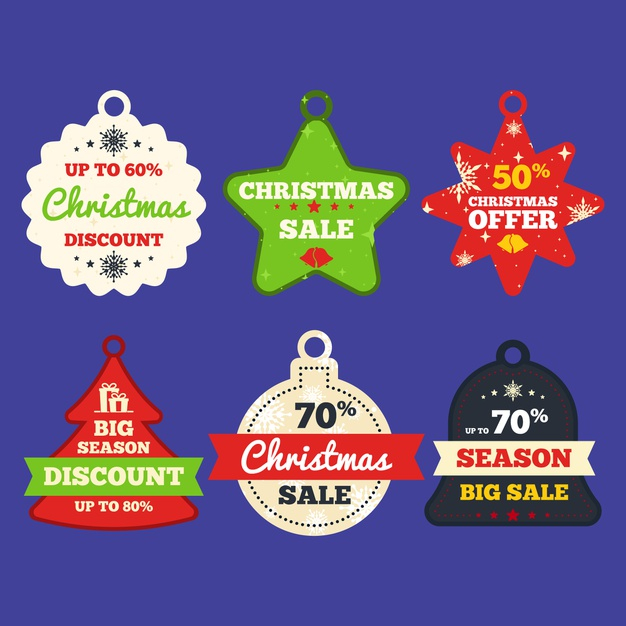

En época de fiestas navideñas, es usual que las personas vayan a comprar en frecuencia y montos más de los usuales. Esto puede ser aprovechado inteligentemente por las empresas, al presentarles ofertas y promociones en productos que ellas saben que los clientes están más dispuestos a comprar. Específicamente, en relación a las promociones de llevar más de un producto a la vez con un descuento, o a determinar la disposición de los productos en una tienda, es útil poder tener una idea de cuáles productos tienen la mayor posibilidad de ser adquiridos a la vez.

En el desafío de hoy, vamos a elegir una pareja de productos que serán ofrecidos en una campaña publicitaria, para ser adquiridos juntos en un mismo paquete.

Si tuvieras que hacer tu lista de compras para navidad, que pondrías? Asumiendo que puedes tener gratis todo lo que pongas ahí. Considera que algunas cosas que compres, pueden también necesitar de otras de la lista.

Se ha realizado una pequeña encuesta, con la que se obtuvo la información para el presente dataset.

## PARTE 1: Extracción de reglas de asociación

En ese notebook vamos a extraer reglas de asociación en Python. Para ello, utilizaremos el algoritmo Apriori implementado en la libreria <b>apyori</b>.

In [ ]:
# instala libreria apyori
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=c14635f2aa7f52dc9526514f0066052c4105f157412f1d0f33d581eca7df20d2
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
# Importa librerias importantes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

### Carga los datos

In [ ]:
# carga el archivo con los datos
filename = "https://github.com/DanielSaromo/Courses_DataFiles/blob/main/P4DS_CETAM/whishlist_navidad.csv?raw=true"
customerWhishes_data = pd.read_csv(filename, header=None)
customerWhishes_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Smartphone,Laptop,Mouse,Teclado,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Juego de mesa,Panetón,Chocolate para taza,...,Pavo,Vino / champagne / otras bebidas,Cubo de rubik,Árbol de navidad,Nacimiento navideño,Luces de navidad,Harina,Mantequilla,Huevo,Molde para galletas
1,Juego de mesa,Panetón,Chocolate para taza,Leche,Cocoa,Azúcar,Duraznos en almíbar,Vino / champagne / otras bebidas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Smartphone,Laptop,Mouse,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Leche,Cocoa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Radio musical a pilas (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Nacimiento navideño,Luces de navidad,Harina,Mantequilla,Huevo,Molde para galletas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Panetón,Chocolate para taza,Leche,Cocoa,Azúcar,Luces de navidad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cada fila del dataset es una transaccion semanal de un cliente. Las columnas indican los items comprados en la transaccion (una columna no tiene necesariamente el mismo item). Valores NaN son valores nulos (colocados de relleno al importar los datos.

### Convertir los datos a una lista de listas

In [ ]:
# prepara la data en la forma de lista de lista . Cada lista transaccion es una lista interna
records = []
for i in range(len(customerWhishes_data)):
    transaction = []
    for j in range(len(customerWhishes_data.columns)):
        if  pd.isnull(customerWhishes_data.values[i,j]) == False:  # if el item [i,j] no es  NaN
            transaction.append( customerWhishes_data.values[i,j] )
    records.append(transaction)

In [ ]:
records

[['Smartphone',
  ' Laptop',
  ' Mouse',
  ' Teclado',
  ' Carro a control remoto (sin pilas)',
  ' Radio musical a pilas (sin pilas)',
  ' Pilas / baterías',
  ' Juego de mesa',
  ' Panetón',
  ' Chocolate para taza',
  ' Leche',
  ' Cocoa',
  ' Azúcar',
  ' Duraznos en almíbar',
  ' Pavo',
  ' Vino / champagne / otras bebidas',
  ' Cubo de rubik',
  ' Árbol de navidad',
  ' Nacimiento navideño',
  ' Luces de navidad',
  ' Harina',
  ' Mantequilla',
  ' Huevo',
  ' Molde para galletas'],
 ['Juego de mesa',
  ' Panetón',
  ' Chocolate para taza',
  ' Leche',
  ' Cocoa',
  ' Azúcar',
  ' Duraznos en almíbar',
  ' Vino / champagne / otras bebidas'],
 ['Smartphone',
  ' Laptop',
  ' Mouse',
  ' Carro a control remoto (sin pilas)',
  ' Radio musical a pilas (sin pilas)',
  ' Pilas / baterías',
  ' Panetón',
  ' Chocolate para taza',
  ' Leche',
  ' Cocoa',
  ' Azúcar',
  ' Árbol de navidad',
  ' Nacimiento navideño',
  ' Luces de navidad'],
 ['Radio musical a pilas (sin pilas)',
  ' Pilas 

### Exploremos los datos para ver la frecuencia de aparición de los productos

In [ ]:
customerWhishes_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Smartphone,Laptop,Mouse,Teclado,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Juego de mesa,Panetón,Chocolate para taza,...,Pavo,Vino / champagne / otras bebidas,Cubo de rubik,Árbol de navidad,Nacimiento navideño,Luces de navidad,Harina,Mantequilla,Huevo,Molde para galletas
1,Juego de mesa,Panetón,Chocolate para taza,Leche,Cocoa,Azúcar,Duraznos en almíbar,Vino / champagne / otras bebidas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Smartphone,Laptop,Mouse,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Leche,Cocoa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Radio musical a pilas (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Nacimiento navideño,Luces de navidad,Harina,Mantequilla,Huevo,Molde para galletas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Panetón,Chocolate para taza,Leche,Cocoa,Azúcar,Luces de navidad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Carro a control remoto (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Leche,Cubo de rubik,Árbol de navidad,Nacimiento navideño,Luces de navidad,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Smartphone,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Harina,Mantequilla,Huevo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Laptop,Mouse,Teclado,Panetón,Chocolate para taza,Leche,Árbol de navidad,Luces de navidad,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Smartphone,Laptop,Mouse,Panetón,Chocolate para taza,Pavo,Vino / champagne / otras bebidas,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Smartphone,Laptop,Pilas / baterías,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Put all transactions into a single list
txns=customerWhishes_data.values.reshape(-1).tolist()

# Convert all values of the list to strings
txns=[str(x) for x in txns]

# Remove NaN from list
newtxns=[x for x in txns if x != 'nan']

# Remove leading and trailing whitespaces
for i in range(len(newtxns)):
    newtxns[i]=newtxns[i].strip()

# Create a dataframe using this single list and add a column for count
df_list=pd.DataFrame(newtxns)
df_list['Count']=1

# Group by items and rename columns
df_list=df_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'], ascending=True) # count
df_list['Percentage']=(df_list['Count'] / df_list['Count'].sum()) # percentage (on the 0 to 1 scale)
df_list=df_list.rename(columns={0:'Item'})
df_list=df_list.sort_values(by=['Count'], ascending=False)

# Show dataframe
df_list

,Item,Count,Percentage
18,Pilas / baterías,14,0.112
1,Carro a control remoto (sin pilas),10,0.080
2,Chocolate para taza,10,0.080
16,Panetón,10,0.080
11,Luces de navidad,6,0.048
10,Leche,6,0.048
19,Radio musical a pilas (sin pilas),6,0.048
20,Smartphone,5,0.040
4,Cubo de rubik,5,0.040
9,Laptop,5,0.040


### 1) Extraer un subdataframe con los 10 productos que más aparecen en la selección de los usuarios: <font color='red'>3 puntos</font>

In [ ]:
df_top = df_list[:10].copy()

In [ ]:
df_top

,Item,Count,Percentage
18,Pilas / baterías,14,0.112
1,Carro a control remoto (sin pilas),10,0.080
2,Chocolate para taza,10,0.080
16,Panetón,10,0.080
11,Luces de navidad,6,0.048
10,Leche,6,0.048
19,Radio musical a pilas (sin pilas),6,0.048
20,Smartphone,5,0.040
4,Cubo de rubik,5,0.040
9,Laptop,5,0.040


### 2) Calcular la cantidad total de productos presentes en la lista completa: <font color='red'>3 punto</font>

Calculemos la cantidad de productos totales EN LA LISTA COMPLETA (considerando que un producto repetido se debe contar cada una de dichas veces en las que se repite):

In [ ]:
cantTot = df_list['Count'].sum()
cantTot

125

### 3) Generar un diagrama de barras horizontales que muestre el PORCENTAJE de aparición (frecuencia relativa) de los 10 productos más seleccionados por los usuarios: <font color='red'>3 puntos</font>

Puede utilizar la siguiente función: `plt.barh(...)`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

Por ejemplo, si hubieran en total 40 selecciones de productos, y el producto `'Azúcar'` fue seleccionado 4 veces, tendría una frecuencia relativa expresada en un porcentaje de 10%.


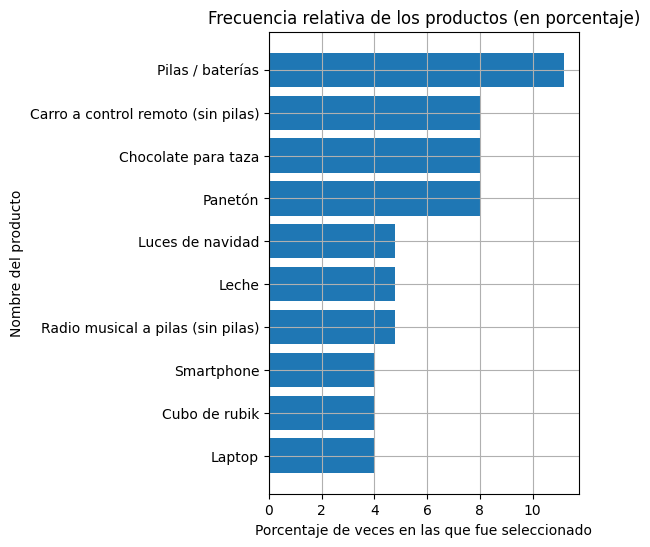

In [ ]:
# Draw a horizontal bar chart
plt.figure(figsize=(4,6))
plt.ylabel('Nombre del producto')
plt.xlabel('Porcentaje de veces en las que fue seleccionado')
plt.title("Frecuencia relativa de los productos (en porcentaje)")
plt.barh(df_top['Item'], df_top['Percentage'] * 100, height=0.8)
#plt.barh(df_top['Item'], width=df_top['Count']/df_list['Count'].sum()*100, height=0.8) # otra forma
plt.grid() # para mostrar la grilla
plt.gca().invert_yaxis() # para invertir el orden de aparición de los elementos en el eje Y
plt.show()

### Aplica el algoritmo Apriori  para extraer las reglas de asociacion



In [ ]:
association_rules = apriori(records, min_support=0.2, min_confidence=0.7, min_lift=3, max_length=3)
association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({' Azúcar', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Cocoa'}), confidence=1.0, lift=4.5), OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Azúcar'}), confidence=1.0, lift=4.5)]),
 RelationRecord(items=frozenset({' Azúcar', ' Leche'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Leche'}), confidence=1.0, lift=3.0)]),
 RelationRecord(items=frozenset({' Cocoa', ' Leche'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Leche'}), confidence=1.0, lift=3.0)]),
 RelationRecord(items=frozenset({' Laptop', 'Smartphone'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Laptop'}), items_add=frozenset({'Smartphone'}), confidence=1.0, lift=3.5999999999999996

In [ ]:
# imprime la cantidad de reglas encontradas
print(len(association_results))

15


In [ ]:
# imprime la primera regla
print(association_results[0])

RelationRecord(items=frozenset({' Azúcar', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Cocoa'}), confidence=1.0, lift=4.5), OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Azúcar'}), confidence=1.0, lift=4.5)])


### 4) Aplicar el algoritmo Apriori para extraer las reglas de asociacion de 2 elementos, con los hiperparámetros `min_support`, `min_confidence`, y `min_lift` mostrados a continuación: <font color='red'>3 puntos</font>

Se solicitan reglas compuestas únicamente por 2 elementos.

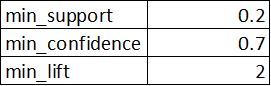

In [ ]:
association_rules = apriori(records, min_support=0.2, min_confidence=0.7, min_lift=2,
                            min_length = 2, max_length = 2)
association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({' Azúcar', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Cocoa'}), confidence=1.0, lift=4.5), OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Azúcar'}), confidence=1.0, lift=4.5)]),
 RelationRecord(items=frozenset({' Azúcar', ' Leche'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Leche'}), confidence=1.0, lift=3.0)]),
 RelationRecord(items=frozenset({' Cocoa', ' Leche'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Leche'}), confidence=1.0, lift=3.0)]),
 RelationRecord(items=frozenset({'Carro a control remoto (sin pilas)', ' Cubo de rubik'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Cubo de rubik'}), items_add=frozenset({'Carro a control 

### 5) Imprimir la cantidad de reglas de asociación mostrada en el paso anterior: <font color='red'>2 puntos</font>

In [ ]:
# imprime la cantidad de reglas encontradas
print(len(association_results))

13


### Con los resultados de la ejecución del algoritmo, crear un dataframe con las columnas: ['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift']:

In [ ]:
association_results[0]

RelationRecord(items=frozenset({' Azúcar', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Cocoa'}), confidence=1.0, lift=4.5), OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Azúcar'}), confidence=1.0, lift=4.5)])

In [ ]:
# Por cada regla

lista_conColumnasOrdenadas = []

for item in association_results:

    # Primer elemento de la regla contiene el par [items base, item añadido]
    pair = item[0]
    items = [x for x in pair]
    print("Regla: {}  ->  {}".format( items[:-1],  items[-1] ) ) # imprime items base y item añadido (el ultimo de items)

    # Segundo elemento de la regla es el soporte
    print("Soporte: " + str(item[1]))

    # Tercer elemento de la regla es son estadisticas (Confianza, Lift)
    print("Confianza: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

    whishes_thisCustomer = [items[:-1][0],  items[-1], item[1], item[2][0][2], item[2][0][3]]
    lista_conColumnasOrdenadas.append([str(val) for val in whishes_thisCustomer])

Regla: [' Azúcar']  ->   Cocoa
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 4.5
Regla: [' Azúcar']  ->   Leche
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 3.0
Regla: [' Cocoa']  ->   Leche
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 3.0
Regla: ['Carro a control remoto (sin pilas)']  ->   Cubo de rubik
Soporte: 0.2222222222222222
Confianza: 0.7999999999999999
Lift: 2.057142857142857
Regla: [' Laptop']  ->  Smartphone
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 3.5999999999999996
Regla: [' Luces de navidad']  ->   Leche
Soporte: 0.2777777777777778
Confianza: 0.8333333333333334
Lift: 2.5000000000000004
Regla: [' Árbol de navidad']  ->   Leche
Soporte: 0.2222222222222222
Confianza: 0.7999999999999999
Lift: 2.4
Regla: [' Nacimiento navideño']  ->   Luces de navidad
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 3.0
Regla: [' Árbol de navidad']  ->   Luces de navidad
Soporte: 0.2222222222222222
Confianza: 0.7999999999999999
Lift: 2.4
Regla: [' Panetón']  ->   Mouse
Sopor

#### Generamos un dataframe

In [ ]:
lista_conColumnasOrdenadas

[[' Azúcar', ' Cocoa', '0.2222222222222222', '1.0', '4.5'],
 [' Azúcar', ' Leche', '0.2222222222222222', '1.0', '3.0'],
 [' Cocoa', ' Leche', '0.2222222222222222', '1.0', '3.0'],
 ['Carro a control remoto (sin pilas)',
  ' Cubo de rubik',
  '0.2222222222222222',
  '0.7999999999999999',
  '2.057142857142857'],
 [' Laptop', 'Smartphone', '0.2222222222222222', '1.0', '3.5999999999999996'],
 [' Luces de navidad',
  ' Leche',
  '0.2777777777777778',
  '0.8333333333333334',
  '2.5000000000000004'],
 [' Árbol de navidad',
  ' Leche',
  '0.2222222222222222',
  '0.7999999999999999',
  '2.4'],
 [' Nacimiento navideño',
  ' Luces de navidad',
  '0.2222222222222222',
  '1.0',
  '3.0'],
 [' Árbol de navidad',
  ' Luces de navidad',
  '0.2222222222222222',
  '0.7999999999999999',
  '2.4'],
 [' Panetón', ' Mouse', '0.2222222222222222', '1.0', '2.0'],
 [' Panetón', ' Nacimiento navideño', '0.2222222222222222', '1.0', '2.0'],
 [' Vino / champagne / otras bebidas',
  ' Panetón',
  '0.2222222222222222',


In [ ]:
output_asDataFrame = pd.DataFrame((lista_conColumnasOrdenadas), columns = ['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'])

In [ ]:
output_asDataFrame

,Antecedents,Consequents,Support,Confidence,Lift
0,Azúcar,Cocoa,0.2222222222222222,1.0,4.5
1,Azúcar,Leche,0.2222222222222222,1.0,3.0
2,Cocoa,Leche,0.2222222222222222,1.0,3.0
3,Carro a control remoto (sin pilas),Cubo de rubik,0.2222222222222222,0.7999999999999999,2.057142857142857
4,Laptop,Smartphone,0.2222222222222222,1.0,3.5999999999999996
5,Luces de navidad,Leche,0.2777777777777778,0.8333333333333334,2.5000000000000004
6,Árbol de navidad,Leche,0.2222222222222222,0.7999999999999999,2.4
7,Nacimiento navideño,Luces de navidad,0.2222222222222222,1.0,3.0
8,Árbol de navidad,Luces de navidad,0.2222222222222222,0.7999999999999999,2.4
9,Panetón,Mouse,0.2222222222222222,1.0,2.0


Hasta este punto, hemos obtenido un DataFrame con las reglas de asociación que involucran únicamente dos productos.

## PARTE 2: Empleo de las reglas de asociación para seleccionar una pareja de productos para la campaña de marketing

Veamos la siguiente promoción de una conocida tienda italiana que vende productos electrónicos:

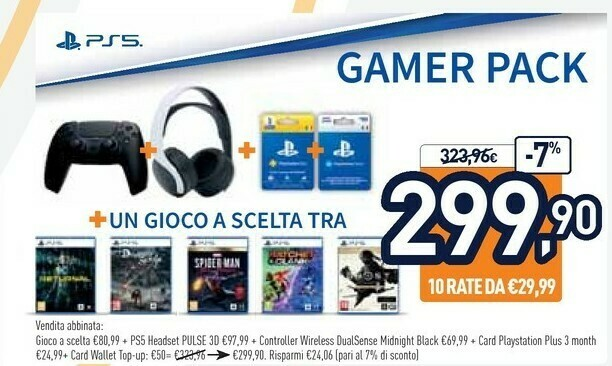

Observamos que hay una oferta al comprar los siguientes productos juntos: controlador (joystick), audífonos gamer, dos cartas regalo para PS5 (una dorada y una plateada), y un juego para PS5 (a ser elegido de la lista de opciones mostrada).

¿Cómo elegir la lista de productos que, en base a nuestros datos, tenga una mayor probabilidad de ser adquirida por nuestros clientes?

Usando las reglas de asociación obtenidas en la parte 1 del presente desafío, y aplicando la teoría vista en clase, vamos a seleccionar la pareja de productos para nuestra oferta por campaña navideña.

### Ordenamiento múltiple de columnas en pandas

Vamos a profundizar un poco en cómo ordenar columnas en pandas.

In [ ]:
import pandas as pd
technologies = ({
    'Courses':["Spark","Hadoop","Pandas","Oracle","Java","Numpy"],
    'Fee' :[20000,25000,25000,22000,20000,20000],
    'Duration':['30days','35days','40days','50days','60days','10days'],
    'Discount':[1000,2300,1500,1200,4000,3000]
               })
df = pd.DataFrame(technologies, index = ['r1','r2','r3','r4','r0','r05'])
df

,Courses,Fee,Duration,Discount
r1,Spark,20000,30days,1000
r2,Hadoop,25000,35days,2300
r3,Pandas,25000,40days,1500
r4,Oracle,22000,50days,1200
r0,Java,20000,60days,4000
r05,Numpy,20000,10days,3000


Vamos a ordenar de acuerdo a la columna `Fee`, de forma DEcreciente:

In [ ]:
df2 = df.sort_values(by='Fee', ascending=False)
df2

,Courses,Fee,Duration,Discount
r2,Hadoop,25000,35days,2300
r3,Pandas,25000,40days,1500
r4,Oracle,22000,50days,1200
r1,Spark,20000,30days,1000
r0,Java,20000,60days,4000
r05,Numpy,20000,10days,3000


In [ ]:
# Esta es una forma alternativa exactamente equivalente, pero más generalizable:
df2 = df.sort_values(by=['Fee'], ascending=[False])
df2

,Courses,Fee,Duration,Discount
r2,Hadoop,25000,35days,2300
r3,Pandas,25000,40days,1500
r4,Oracle,22000,50days,1200
r1,Spark,20000,30days,1000
r0,Java,20000,60days,4000
r05,Numpy,20000,10days,3000


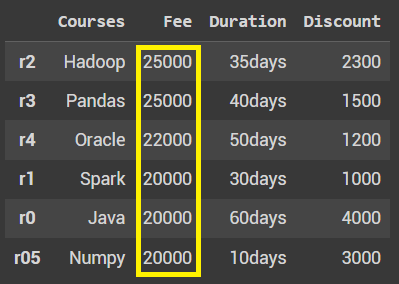

Ahora, vamos a ordenar primero decrecientemente respecto a la columna `Fee`, y luego crecientemente respecto a la columna `Discount`.

In [ ]:
df3 = df.sort_values(by=['Fee', 'Discount'], ascending=[False, True])
df3

,Courses,Fee,Duration,Discount
r3,Pandas,25000,40days,1500
r2,Hadoop,25000,35days,2300
r4,Oracle,22000,50days,1200
r1,Spark,20000,30days,1000
r05,Numpy,20000,10days,3000
r0,Java,20000,60days,4000


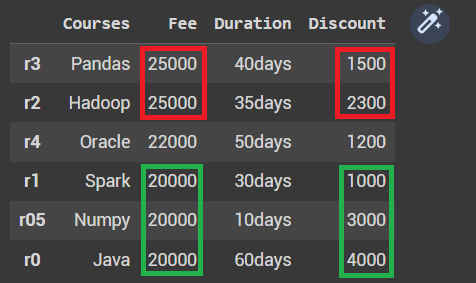

Códigos adaptados de: https://sparkbyexamples.com/pandas/pandas-sort-dataframe-by-multiple-columns/

### 6) Ordenar el dataframe creado en el paso anterior, de forma descendiente según sus valores de la columna que usted considere conveniente, para seleccionar una pareja de productos para proponer en una promoción navideña: <font color='red'>2 puntos</font>

*Notar que la cantidad de datos utilizados es pequeña, y asumimos que todos los participantes del formulario llenaron la encuesta "de buena fe" y no simplemente llenaron las casillas arbitrariamente.*

<font color=green> **Condiciones numéricas que deben cumplirse para la selección:**</font>


<font color=green> - Verificar que el valor de `'Lift'` sea mayor a 1.</font>

<font color=green> - Verificar que el valor de `'Confidence'` sea mayor a 0.7</font>

<font color=green> - Verificar que el valor de `'Support'` sea mayor a 0.2</font>

Es parte de la evaluación la selección de la columna para poder elegir la pareja de productos deseada.

Si desea, puede realizar más de un ordenamiento para poder encontrar la pareja de productos que va a seleccionar. Puede ordenar primero respecto a una columna, y en otra celda, ordenar respecto dos columnas. Indicar cuál es el ordenamiento final que usó para brindar su respuesta.

Debe imprimir el dataframe ordenado.

In [ ]:
output_asDataFrame.head()

,Antecedents,Consequents,Support,Confidence,Lift
0,Azúcar,Cocoa,0.2222222222222222,1.0,4.5
1,Azúcar,Leche,0.2222222222222222,1.0,3.0
2,Cocoa,Leche,0.2222222222222222,1.0,3.0
3,Carro a control remoto (sin pilas),Cubo de rubik,0.2222222222222222,0.7999999999999999,2.057142857142857
4,Laptop,Smartphone,0.2222222222222222,1.0,3.5999999999999996


In [ ]:
output_asDataFrame.sort_values(by=['Lift'], ascending=False)

,Antecedents,Consequents,Support,Confidence,Lift
0,Azúcar,Cocoa,0.2222222222222222,1.0,4.5
4,Laptop,Smartphone,0.2222222222222222,1.0,3.5999999999999996
1,Azúcar,Leche,0.2222222222222222,1.0,3.0
2,Cocoa,Leche,0.2222222222222222,1.0,3.0
7,Nacimiento navideño,Luces de navidad,0.2222222222222222,1.0,3.0
5,Luces de navidad,Leche,0.2777777777777778,0.8333333333333334,2.5000000000000004
6,Árbol de navidad,Leche,0.2222222222222222,0.7999999999999999,2.4
8,Árbol de navidad,Luces de navidad,0.2222222222222222,0.7999999999999999,2.4
3,Carro a control remoto (sin pilas),Cubo de rubik,0.2222222222222222,0.7999999999999999,2.057142857142857
9,Panetón,Mouse,0.2222222222222222,1.0,2.0


In [ ]:
output_asDataFrame.sort_values(by=['Confidence'], ascending=False)

,Antecedents,Consequents,Support,Confidence,Lift
0,Azúcar,Cocoa,0.2222222222222222,1.0,4.5
1,Azúcar,Leche,0.2222222222222222,1.0,3.0
2,Cocoa,Leche,0.2222222222222222,1.0,3.0
4,Laptop,Smartphone,0.2222222222222222,1.0,3.5999999999999996
7,Nacimiento navideño,Luces de navidad,0.2222222222222222,1.0,3.0
9,Panetón,Mouse,0.2222222222222222,1.0,2.0
10,Panetón,Nacimiento navideño,0.2222222222222222,1.0,2.0
11,Vino / champagne / otras bebidas,Panetón,0.2222222222222222,1.0,2.0
12,Panetón,Árbol de navidad,0.2777777777777778,1.0,2.0
5,Luces de navidad,Leche,0.2777777777777778,0.8333333333333334,2.5000000000000004


In [ ]:
output_asDataFrame.sort_values(by=['Lift', 'Confidence'], ascending=[False, False]) # esta es una solución válida (no es la única, pero es la que se usa en el solucionario)

,Antecedents,Consequents,Support,Confidence,Lift
0,Azúcar,Cocoa,0.2222222222222222,1.0,4.5
4,Laptop,Smartphone,0.2222222222222222,1.0,3.5999999999999996
1,Azúcar,Leche,0.2222222222222222,1.0,3.0
2,Cocoa,Leche,0.2222222222222222,1.0,3.0
7,Nacimiento navideño,Luces de navidad,0.2222222222222222,1.0,3.0
5,Luces de navidad,Leche,0.2777777777777778,0.8333333333333334,2.5000000000000004
6,Árbol de navidad,Leche,0.2222222222222222,0.7999999999999999,2.4
8,Árbol de navidad,Luces de navidad,0.2222222222222222,0.7999999999999999,2.4
3,Carro a control remoto (sin pilas),Cubo de rubik,0.2222222222222222,0.7999999999999999,2.057142857142857
9,Panetón,Mouse,0.2222222222222222,1.0,2.0


También podemos filtrar mediante código, a aquellas reglas que cumplen con los valores numéricos solicitados:

In [ ]:
# primero vamos a convertir columnas relevantes a tipo numérico
# convertimos las columnas 'Lift', 'Confidence' y 'Support' a tipo numérico utilizando pd.to_numeric(...)
sorted_df = output_asDataFrame.copy() # realizamos una copia del dataframe original
sorted_df['Lift'] = pd.to_numeric(sorted_df['Lift'])
sorted_df['Confidence'] = pd.to_numeric(sorted_df['Confidence'])
sorted_df['Support'] = pd.to_numeric(sorted_df['Support'])

In [ ]:
# filtramos el dataframe según los criterios:
df_filtrado = sorted_df[
    (sorted_df['Lift'] > 1.0) &
    (sorted_df['Confidence'] > 0.7) &
    (sorted_df['Support'] > 0.2)
].copy() # por seguridad, agregamos el .copy()

# al dataframe filtrado le aplicamos el mismo ordenamiento mostrado en la celda de código anterior
df_filtrado.sort_values(by=['Lift', 'Confidence'], ascending=[False, False]) # esta es una solución válida (no es la única, pero es la que se usa en el solucionario)

,Antecedents,Consequents,Support,Confidence,Lift
0,Azúcar,Cocoa,0.222222,1.000000,4.500000
4,Laptop,Smartphone,0.222222,1.000000,3.600000
1,Azúcar,Leche,0.222222,1.000000,3.000000
2,Cocoa,Leche,0.222222,1.000000,3.000000
7,Nacimiento navideño,Luces de navidad,0.222222,1.000000,3.000000
5,Luces de navidad,Leche,0.277778,0.833333,2.500000
6,Árbol de navidad,Leche,0.222222,0.800000,2.400000
8,Árbol de navidad,Luces de navidad,0.222222,0.800000,2.400000
3,Carro a control remoto (sin pilas),Cubo de rubik,0.222222,0.800000,2.057143
9,Panetón,Mouse,0.222222,1.000000,2.000000


### 7) Seleccionar una pareja de productos que se usarían en una promoción navideña (christmas bundle pack), según las condiciones dadas a continuación (vistas en la parte teórica): <font color='red'>2 puntos</font>

<font color=green> **Condiciones numéricas que deben cumplirse para la selección:**</font>


<font color=green> - Verificar que el valor de `'Lift'` sea mayor a 1.</font>

<font color=green> - Verificar que el valor de `'Confidence'` sea mayor a 0.7</font>

<font color=green> - Verificar que el valor de `'Support'` sea mayor a 0.2</font>

<font color=skyblue> Aplicando ciencia de datos (específicamente, análisis de agrupamientos) para realizar una promoción navideña en la que se motive a los clientes a comprar dos productos juntos, se eligió la pareja de productos: `'Cocoa'` y `'Azúcar'`, lo cual es intuitivamente razonable. Además, se observa que es la pareja con el mayor valor de lift, por lo que, según el algoritmo, es altamente probable que el cliente lleve `'Cocoa'` si ya ha elegido `'Azúcar'`.</font>

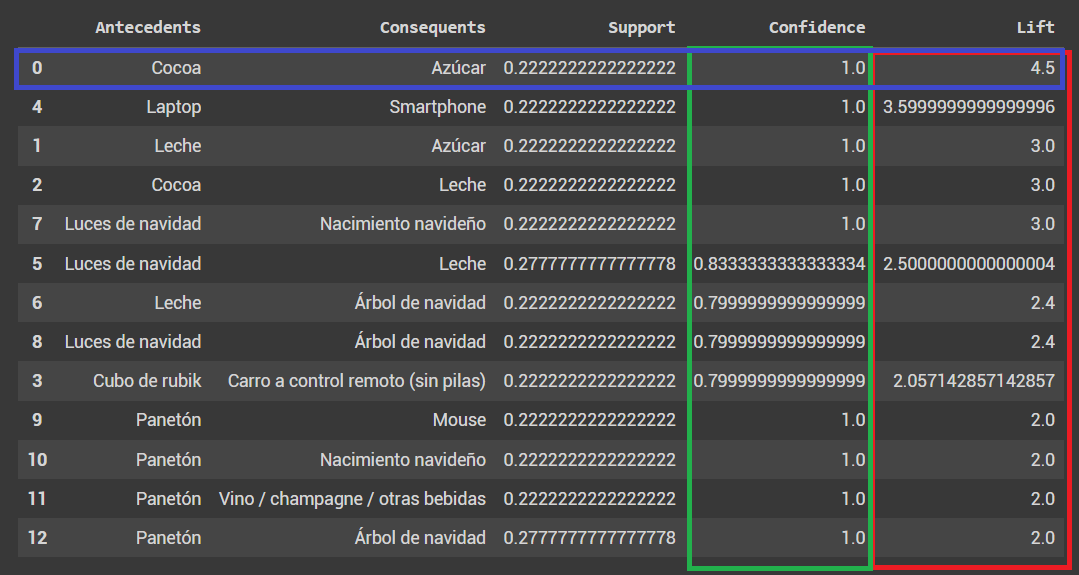

<font color=skyblue> No existe una única respuesta, y existen varias parejas de productos que cumplen con las condiciones mínimas para ser consideradas como convenientes para la promoción. Dichos umbrales numéricos fueron descritos en el enunciado de la pregunta 6.</font>

### 8) Justificar por qué eligió dicha columna o columnas para el ordenamiento, en su exploración de las reglas para seleccionar los productos que colocará en la oferta a proponer en base a su análisis: <font color='red'>2 puntos</font>

<font color=skyblue> Se eligió ordenar por el valor de `'Lift'` porque se quiere un producto (consecuente) que sea altamente probable de ser comprado, dado que el producto antecedente sí es comprado. Además, se buscó tener una alta confianza (columna `'Confidence'`), para tener una pareja de valores de las cuales el algoritmo esté seguro de su elección.</font>